## Quiz #0307

### "EDA and ANOVA for guinea pig tooth growth"

In [27]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

#### Answer the following questions by providing Python code:

We will use the dataset "data_ToothGrowth.csv". 
- len = teeth length. 
- supp = supplementary type with two possible values: VC (vitamin C) or OJ (orange juice). 
- dose (mgr/day) = dosage per day with three possible values: 0.5, 1.0, 2.0.

In [28]:
# Go to the directory where the data file is located. 
#os.chdir(r'~~')                # Please, replace the path with your own.  

In [29]:
df = pd.read_csv('data_ToothGrowth.csv', header='infer')

In [30]:
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   len     60 non-null     float64
 1   supp    60 non-null     object 
 2   dose    60 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


1). Perform the EDA and ANOVA ($\alpha=$ 5%) with the 'supp' variable. <br>
Summarize the result.

In [38]:
# Categories of 'supp'. 
df['supp'].unique()


array(['VC', 'OJ'], dtype=object)

In [40]:
# Group by category.
supp_grp = df.groupby(['supp']).mean()
supp_grp

,len,dose
supp,,
OJ,20.663333,1.166667
VC,16.963333,1.166667


<AxesSubplot:>

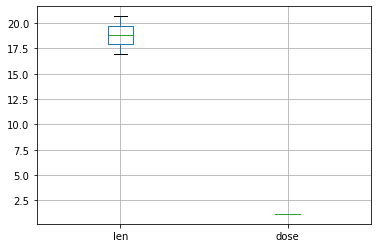

In [93]:
supp_grp.boxplot()

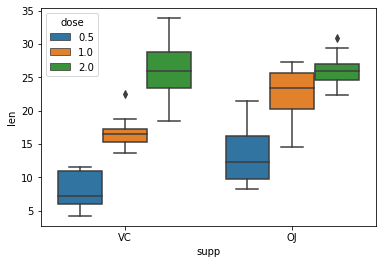

In [53]:
ax=sns.boxplot(x='supp',y='len', hue='dose',data=df)

In [18]:
# ANOVA.
vc = df[df.supp=='VC']
oj = df[df.supp=='OJ']
t,p = st.f_oneway(vc["dose"],oj["dose"])
print(st.f_oneway(vc["dose"],oj["dose"]))
print(p)

F_onewayResult(statistic=4.80007774025107e-31, pvalue=1.0)
1.0


In [83]:
# Result summary.
if p < 0.05 :
    print("null hypothesis rejected")
else:
    print("null hypothesis accepted")


null hypothesis accepted


2). Perform the EDA and ANOVA ($\alpha=$ 5%) with the 'dose' variable. <br>
Summarize the result.

In [46]:
# Categories of 'dose'. 
df['dose'].unique()

array([0.5, 1. , 2. ])

In [47]:
# Group by category.
dose_grp = df.groupby(['dose']).mean()
dose_grp

,len
dose,
0.5,10.605
1.0,19.735
2.0,26.100


<AxesSubplot:>

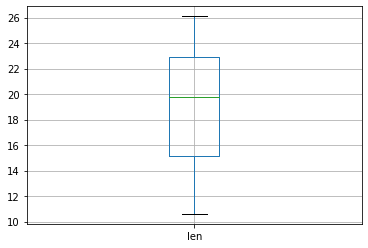

In [92]:
dose_grp.boxplot()

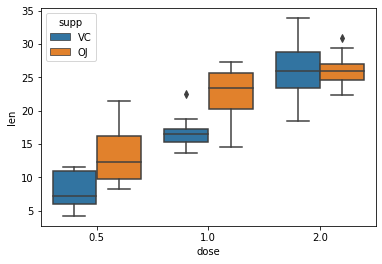

In [71]:
ax=sns.boxplot(x='dose',y='len', hue='supp',data=df)

In [84]:
# ANOVA.
x = df[df.dose==0.5]
y = df[df.dose==1.0]
z = df[df.dose==2.0]
t1,p1 = st.f_oneway(x["len"],y["len"],z['len'])
print(st.f_oneway(x["len"],y["len"],z['len']))
print(p1)

F_onewayResult(statistic=67.41573785674247, pvalue=9.532727011699946e-16)
9.532727011699946e-16


In [86]:
# Result summary.
if p1 < 0.05 :
    print("null hypothesis rejected")
else:
    print("null hypothesis accepted")

null hypothesis rejected
